# **Pre - entrega**

## Data Science I: Fundamentos para la Ciencia de Datos

 **Consigna:**


1.   Generar preguntas o hipótesis de interés sobre el dataset elegido para el proyecto final.
2.  Crear gráficos que usen al menos tres variables y hacer un diagnóstico de lo que los mismos nos están diciendo.
3.  Vincular los gráficos y análisis numéricos hechos hasta el momento con las preguntas de interés.
4.  Identificar valores perdidos.

## **Acerca del DataSet - MetaData**

 **Abstract**


*   El conjunto de datos de eligibilidad de tarjetas de credito proporciona informacion para comprender los factores que influyen en la elegibilidad de un individuo para una tarjeta de crédito. Este conjunto de datos contiene una variedad de criterios o caractersticas demograficas, personales y financieras que, generalmente, las instituciones financieras consideran al evaluar la posibilidad de un individuo de obtener credito.

 Cada fila del conjunto de datos representa un individuo unico, con una identificacion unica 'Id'. Cada columna representa los criterios con  los que voy a trabajar el analisis que van desde informacion demografica basica, como genero y edad, hasta caracteristicas financieras como trabajo, ingresos totales, sitacion laboral y demas. Aparte de esto la base de datos tambien contiene caracteristicas personales tanto como la cantidad de hijos, estado civil, ocupacion y educacion, lo cual nos brinda conocimiento acerca de los antecedentes y situacion de cada individuo en cuestion.
 Los investigadores, analistas e instituciones financieras pueden aprovechar este conjunto de datos para obtener información sobre los factores clave que influyen en la elegibilidad de las tarjetas de crédito y desarrollar modelos predictivos que ayuden a automatizar el proceso de evaluación crediticia. Al comprender la relación entre varios atributos y la elegibilidad de las tarjetas de crédito, las partes interesadas pueden tomar decisiones más informadas, mejorar las estrategias de evaluación de riesgos y mejorar los esfuerzos de segmentación y orientación de los clientes.

 Este conjunto de datos es valioso para una amplia gama de aplicaciones dentro de la industria financiera, incluida la gestión del riesgo crediticio, la gestión de las relaciones con los clientes y el análisis de marketing. Además, proporciona un recurso valioso para la investigación académica y con fines educativos, permitiendo a estudiantes e investigadores explorar la intrincada dinámica de la determinación de la elegibilidad para tarjetas de crédito.


 *   Conjunto de datos obtenido de: https://www.kaggle.com/datasets/rohit265/credit-card-eligibility-data-determining-factors




**Diccionario de datos "Variables"**


*   ID: Identidad unica para cada idividuo 'cliente'.
*  Gender: Sexo del individuo. 0:hombre, 1:mujer.
*  Own_car: Caracteristica binaria que indica si el individuo tiene o no auto. 0 = no tiene ; 1 = si tiene.
*  Own_property: Caracteristica binaria que indica si el individuo es dueño de una propiedad o no. 0 = no; 1 = si.
*  Work_phone: Característica binaria que indica si la persona tiene un teléfono del trabajo. 0 = no; 1 = si.
*  Phone: Caracteristica biaria que indica si el individuo tiene telefono o no. 0 = no; 1 = si.
*  Email: Característica binaria que indica si el individuo ha proporcionado una dirección de correo electrónico. 0 = no; 1 = si.
*  Unemployed: Caracteristica binaria que indica si el individuo es desempleado. 0 = no; 1 = si.
*  Num_children: Cantidad de hijos por individuo.
*  Num_family: Cantidad de familiares que el individuo tiene.
*  Account_length: Duración de la cuenta del individuo en un banco o institución financiera.
*  Total_income: Ingresos totales del individuo.
*  Age: Edad del individuo.
*  Years_employed: Cantidad de años que el individuo ha sido empleado.
*  Income_type: Tipos de ingresos.
*  Education_type: Nivel de educacion del individuo.
*  Family_status: Estado civil del individuo.
*  Housing_type: Tipo de hogar en el que vive el individuo.
*  Occupation_type: Tipo de ocupacion que desempeña el individuo.
*  Target: Variable objetiva que indica si el individuo es elegible para una tarjeta de crédito.







### **Importacion de DataSet**

**Importacion de librerias**

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [26]:
mpl.style.use('bmh')

**Importacion dataset**

In [4]:
from google.colab import drive
import os
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


**Pre visualizacion dataset**

In [5]:
df_CreditCards = pd.read_csv(os.path.join('Curso Coder Data Science/credit_card_eligibility_data.csv'))
df_CreditCards.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0




*  Observamos que el conjunto de datos contiene datos cualitativos y cuantitativos.



In [6]:
#Utilizamos el metodo shape para ver la dimension de nuestro dataset
df_CreditCards.shape

(9709, 20)



*   Observamos que el conjunto de datos tiene 9709 filas y 20 columnas



In [7]:
#Con el metodo info obersvamos los datos no nulos y verificamos si existen
df_CreditCards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  



*   En este conjunto de datos no hay datos nulos.



In [8]:
#Utilizamos el metodo describe para hacer un resumen de analisis estadistico del df_CreditCards (no me sirve para las columnas con criterio binario)
df_CreditCards.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000




*   En las variables cuantitativas, vemos que se realizaron distintos calculos como la mediana de la edad, donde vemos que el 50% de los individuos tiene mas o menos de 42,741466 años. A su vez vemos que la media es 43.784093, lo cual se aproxima a la mediana entonces podriamos decir que la distribucion de la edad es aproximadamente normal. Tambien podemos ver que la edad minima es de 20,5 años y la maxima de 68,86 años.
*   A su vez podemos ver que la columna Years_employed no tiene una distribucion normal debido a la diferencia entre su media y su mediana pero sabemos que el promedio de los individuos llevan 5,664730 años siendo empleados. Ya de por si vemos valores criticos al observar que el percentil 75 es 8.2 y el valor maximo es 43.
*   Asimismo, podemos ver que la mayoria de los individuos no tienen hijos ya que la media se aproxima a 0. Aun asi el numero maximo de hijos es 19, debe haber algun valor critico. Asi como que la distribucion de numero de familiares es aproximadamente normal. El maximo numero de familiares es de 20 personas y el minimo es de 1, deben haber valores criticos.
*   Guiandome por la media de la variable Target, veo que la mayoria de los individuos no cumplen con los criterios para pertenecer al target ya que el promedio de la eleccion se aproxima a 0.






### **Graficos de analisis**

**1. ¿Cual sera la distribucion de la variable target en la muestra?**

Hipotesis: Se espera que la mayoria de los individuos no pertenezcan al target y la diferencia entre los criterios 0 y 1 sea bastante significativa.



In [10]:
Target_Count=df_CreditCards.Target.value_counts()
Target_Count

Target
0    8426
1    1283
Name: count, dtype: int64

Text(0, 0.5, 'Frecuencia')

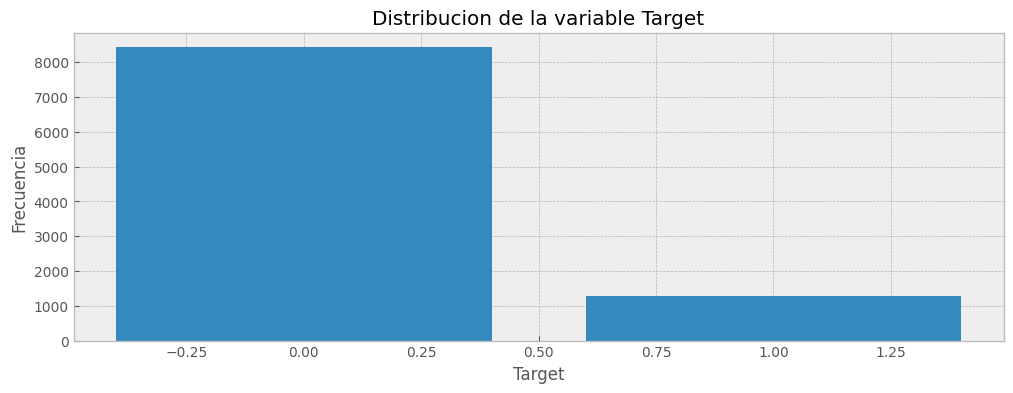

In [30]:
fig, ax = plt.subplots(figsize=(12,4))
ax.bar(Target_Count.index, Target_Count)
ax.set_title('Distribucion de la variable Target')
ax.set_xlabel('Target')
ax.set_ylabel('Frecuencia')



*   Se observa que la diferencia entre la cantidad de individuos que pertenecen al target es significativamente menor a la cantidad de individuos que no cumplen los requisitos para pertenecer.



**2. ¿Cual sera la distribucion de edades de la muestra?**

Hipotesis: Se espera que la distribucion de edades siga una distribucion aproximadamente normal con la mayoria de los individuos teniendo una edad cercana al promedio de edad.

Text(0, 0.5, 'Frecuencia')

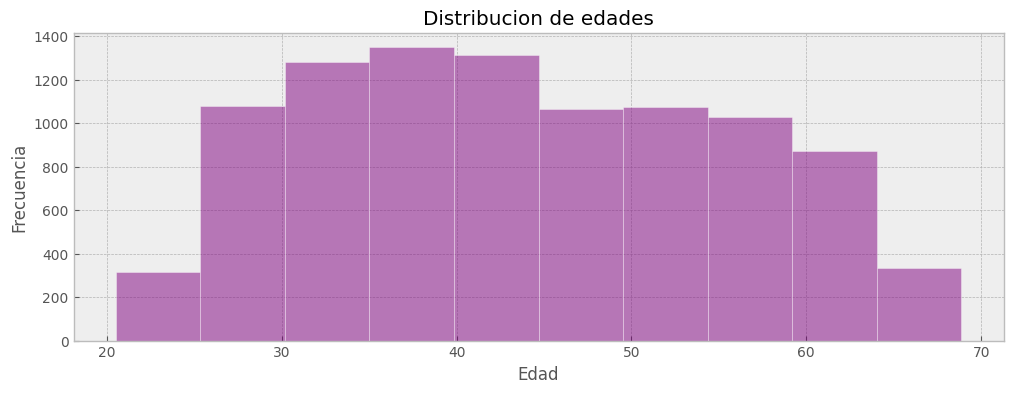

In [28]:
#Histograma
#defino n de bins
min_edad = min(df_CreditCards['Age'])
max_edad = max(df_CreditCards ['Age'])
n = int(np.ceil((max_edad - min_edad)/5))
plt.figure(figsize=(12,4))
plt.hist(df_CreditCards['Age'], bins=n, color='purple', edgecolor='white', alpha=0.5)

plt.title('Distribucion de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')


*   En el eje x se observan los rangos etarios mientras que el eje y muestra la frecuencia de observaciones dentro de cada intervalo.
*   Se puede observar que la minoria de los individuos se encuentran a los extremos de la distribucion. Los datos estan levemente distribuidos asimetricamente hacia la izquierda.
*   Vemos como la mayoria de los individuos estan entre los 30 y los 45 años. Casi 1400 personas tienen entre 35 y 40 años mientras que menos de 400 tienen entre un rango de 20 y 25 y entre un rango de 65y 70.





**3. ¿Como varia la distribucion de cantidad de tiempo siendo empleado de un individuo para considerarse o no del target?**

Hipotesis: Los individuos con mayor cantidad de años siendo empleados tiene menor tendencia a la posibilidad de tener credito.

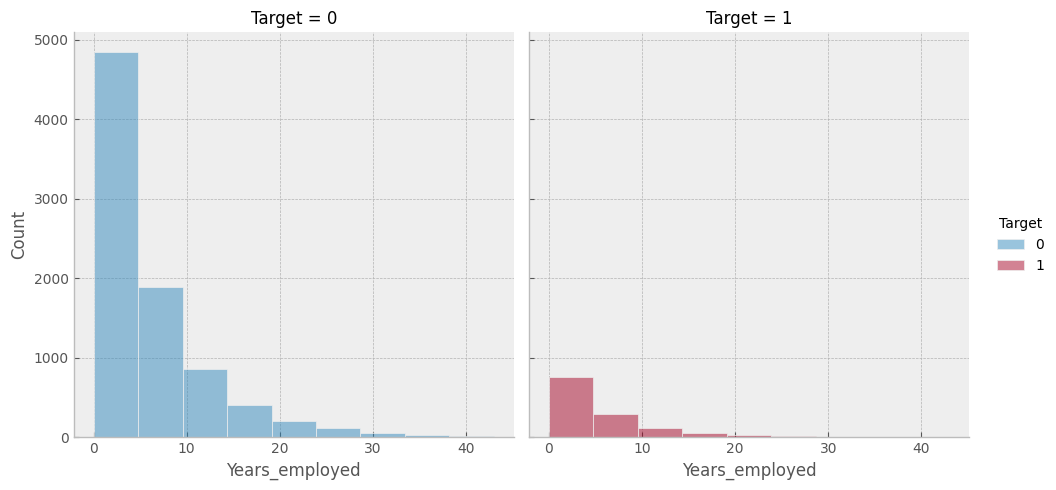

In [29]:
min_years_employed = min(df_CreditCards['Years_employed'])
max_years_employed = max(df_CreditCards['Years_employed'])
m=int(np.ceil((max_years_employed-min_years_employed)/5))

sns.displot(data = df_CreditCards, x = 'Years_employed', bins=m,hue = 'Target', col = 'Target')



*   En primera instancia, podemos observar que la mayoria de los individuos de la muestra tienen de 0 a 5 años empleados, esto se puede deber a que, como vimos en el metodo description, el 25% de la muestra tiene menos de 34 años. Puede asumirse que la edad debe ser crucial al momento de hablar de la cantidad de años de aportes de un individuo.
*   Podemos ver tambien que la cantidad de años maxima de empleados de los individuos que pertenecen al target es menor a 25, y como se puede ver en el grtafico aproximadamente menos de 100 personas de las 1283 llegaron a ese valor. Menos del 10%.
*   Si bien la distribucion entre el grafico de las personas que no pueden obtener credito y el de las personas que si es bastante aproximada, se podria concluir en que hay evidencia suficiente para decir que los individuos con mayor cantidad de años siendo empleados tienen menor tendencia a la posibilidad de tener credito.




  **4. ¿Como influye la edad en la cantidad de años de aporte de un individuo dependiendo de si pertenece al target o no para obtener credito?**

Hipotesis: Las personas que con corta edad ya tienen años de aporte tienen mas posibilidad de tener credito.

<Axes: xlabel='Age', ylabel='Count'>

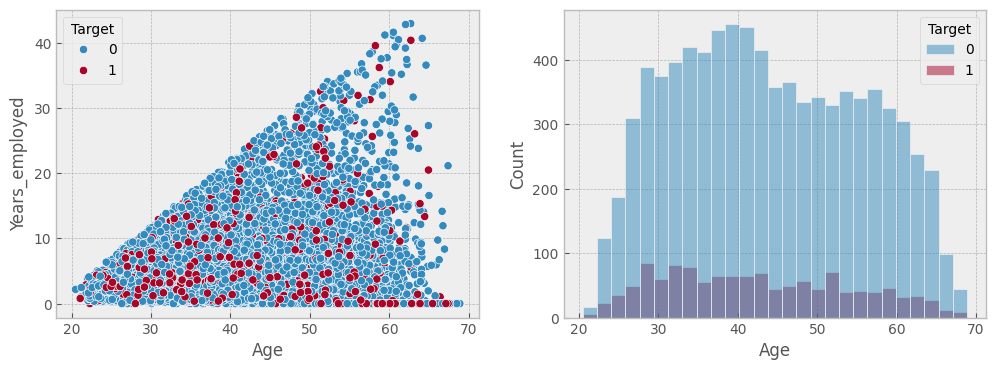

In [27]:
f, axs=plt.subplots(1,2,figsize=(12,4))
sns.scatterplot(data = df_CreditCards, x = 'Age' , y = 'Years_employed', hue = 'Target' , ax = axs[0])
sns.histplot(data = df_CreditCards, x = 'Age', hue ='Target', ax = axs[1])



*   El grafico de la izquierda lo genere para comprender la dimension de la diferencia entre la cantidad de individuos que pertenecen al target y los que no, y la diferencia entre la distribucion de edades. Se puede observar que la edad maxima de las personas que pertenecen al target es 29 (marca de clase entre 28 y 30), conformado con aproximadamente 90 personas. Por otro lado, la edad maxima de las personas que no pertenecen es 39 (marca de clase enre 38 y 40), conformado por mas de 400 personas.
*   En el grafico de la derecha podemos observar que, si bien hay individuos que cumplen el criterio de mientras mas años tenga, mayor años de aporte; hay individuos con menos de 5 años de aportes y una edad mayor a 42. Puede ser que, sin la necesidad de trabajar, el individuo tenga ingresos necesarios para poder acceder a tener credito. Esto puede ser por el tipo de familia, estatus social o estado civil. O tambien del tipo de empleo y salario del individuo.
*   Tambien observamos que por mas que hayan individuos con mas de 35 años de aporte que pertenecen al target, hay mas cantidad de individuos con mas de 35 años de aportes que no pertenecen, por lo tanto no podria concluirse nada acerca de una relacion entre la edad, los años de aporte y pertenecer al target. No hay correlacion.
*   Al estar trabajando con una muestra muy grande se hace complidado observar el grafico scatterplot.



In [ ]:
df_CreditCards.Gender.unique()

array([1, 0])

In [ ]:
#con el metodo value_colunts cuento la cantidad de individuos de ambos sexos.
df_CreditCards.Gender.value_counts()

Gender
0    6323
1    3386
Name: count, dtype: int64



*   Como la diferencia entre hombres (6323) y mujeres (3386) es significativa, al realizar comparaciones entre generos vamos a tener que tener en cuenta que al hablar de frecuencias absolutas, la de los hombres siempre sera mayor, en la mayoria de los casos.



**5.¿El tipo de empleo influye al momento de decidir si un individuo se considera del target?**

Hipotesis: El tipo de empleo si afecta a la hora de decidir si un individuo cumple con los criterios para tener credito.

In [78]:
data_ocupaciones=df_CreditCards.Occupation_type.value_counts()
data_ocupaciones

Occupation_type
Other                    2994
Laborers                 1724
Sales staff               959
Core staff                877
Managers                  782
Drivers                   623
High skill tech staff     357
Accountants               300
Medicine staff            291
Cooking staff             193
Security staff            182
Cleaning staff            146
Private service staff      86
Low-skill Laborers         53
Secretaries                46
Waiters/barmen staff       40
HR staff                   22
IT staff                   18
Realty agents              16
Name: count, dtype: int64

In [65]:
data_ocupaciones_target=df_CreditCards[df_CreditCards['Target']==1].Occupation_type.value_counts()
data_ocupaciones_target

Occupation_type
Other                    370
Laborers                 225
Core staff               128
Managers                 111
Sales staff              110
Drivers                   89
High skill tech staff     50
Medicine staff            45
Accountants               39
Security staff            30
Cooking staff             28
Cleaning staff            20
Low-skill Laborers        11
Private service staff     10
Secretaries                5
Waiters/barmen staff       5
HR staff                   3
Realty agents              2
IT staff                   2
Name: count, dtype: int64

Text(0.5, 1.0, 'Piechart de distribucion de tipos de empleo para target')

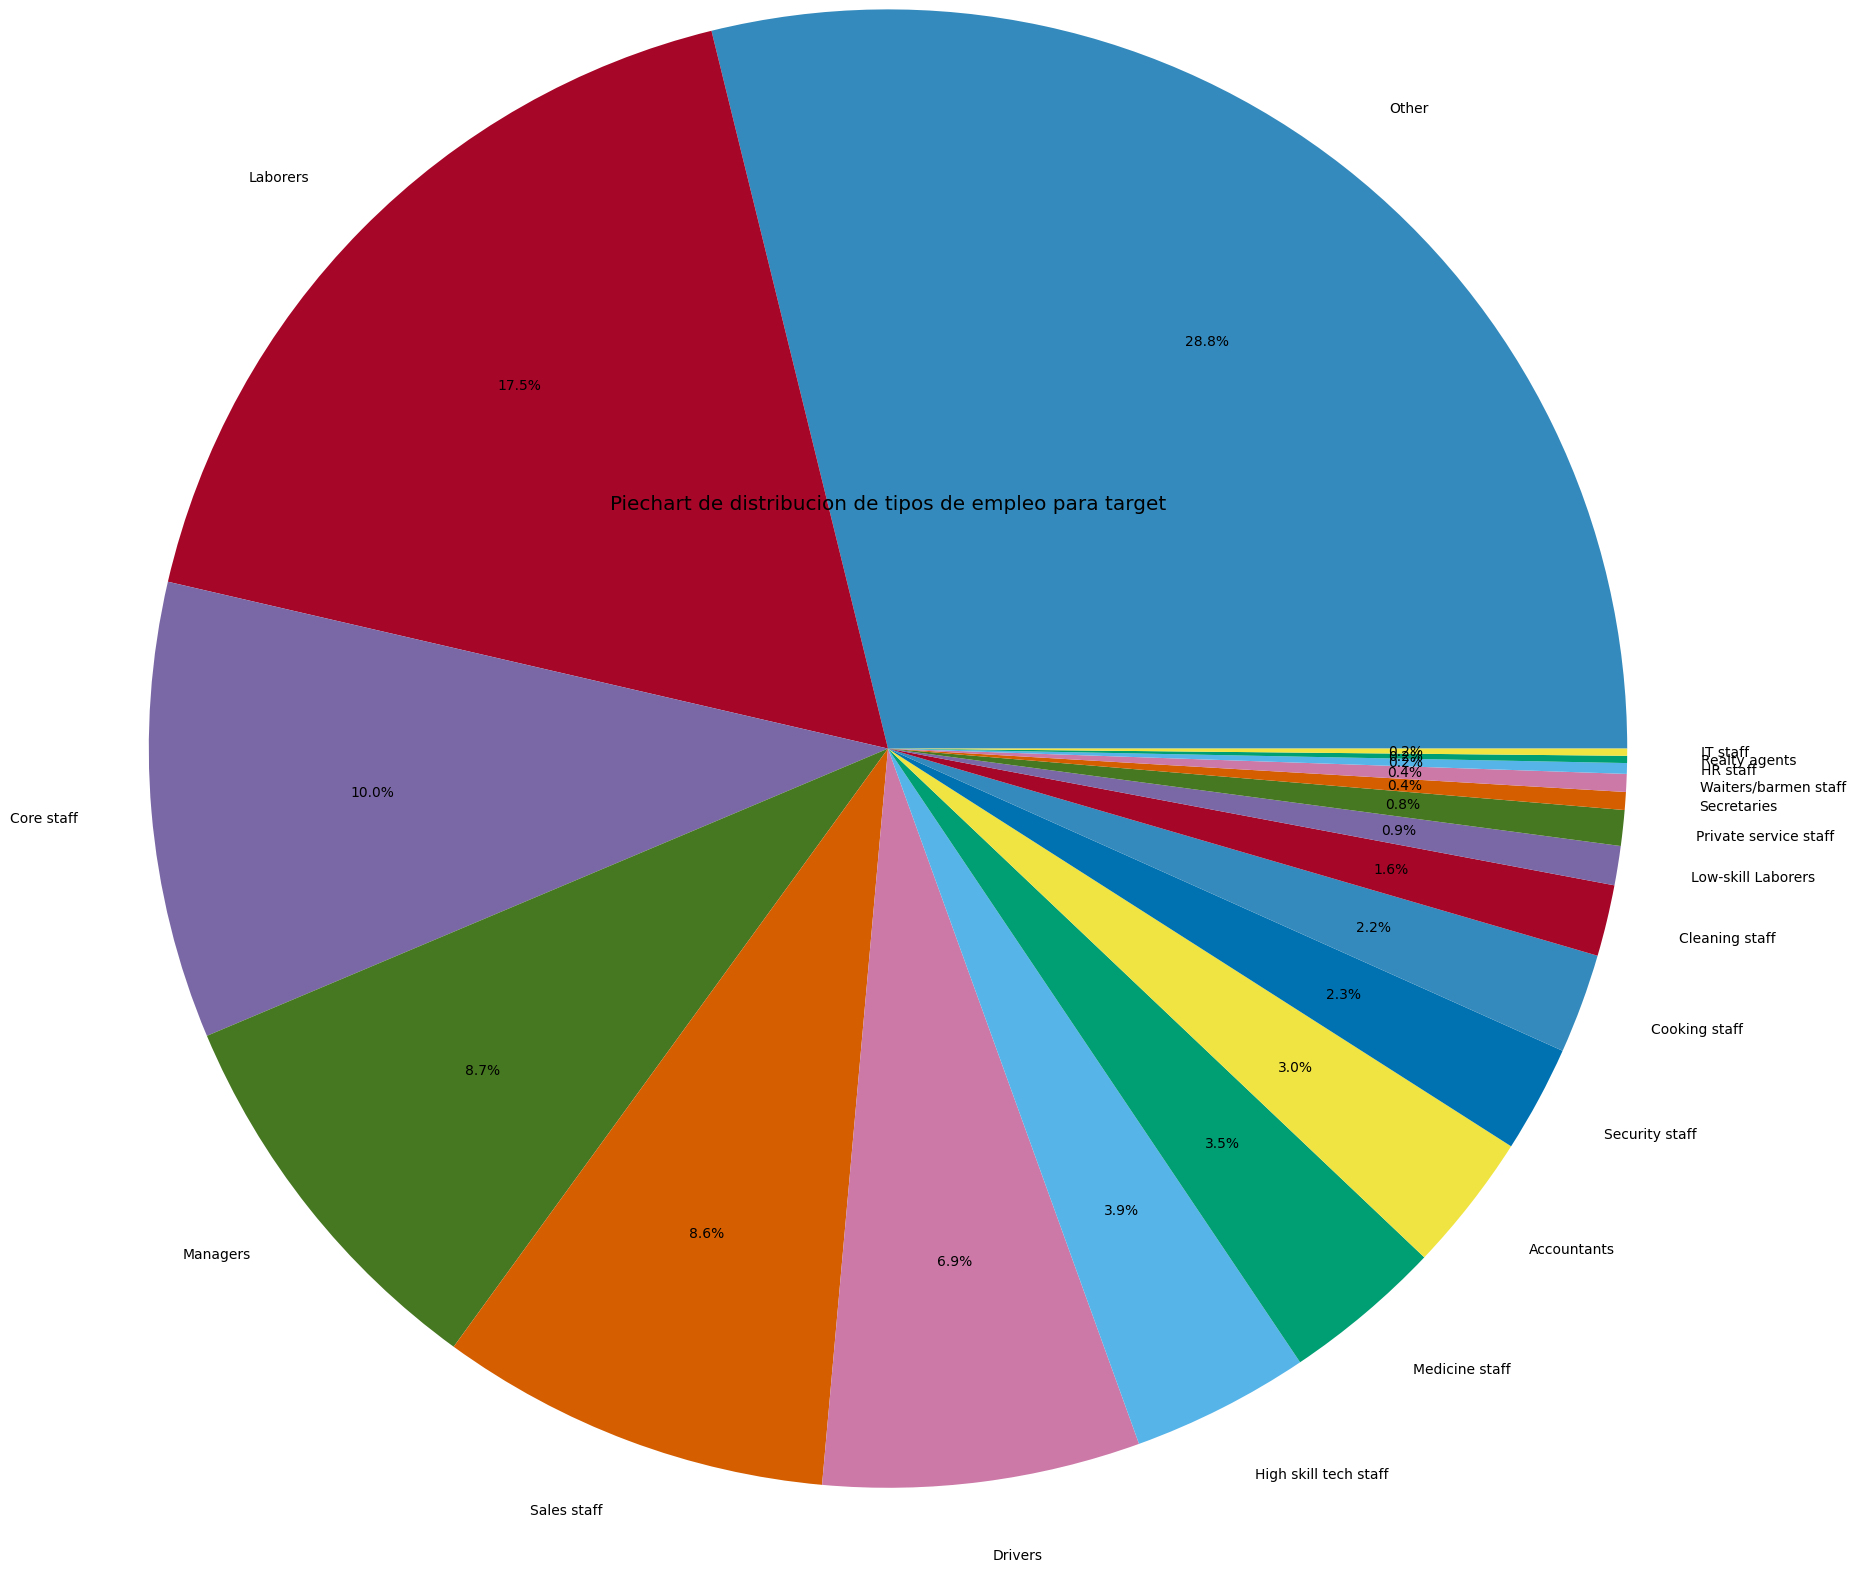

In [84]:
#Realizo un pie chart lo suficientemente grande para que no se pisen las variables.
fig,ax = plt.subplots(figsize =(10, 6))
ax.pie(data_ocupaciones_target, labels = data_ocupaciones_target.index,autopct='%1.1f%%',pctdistance=0.7, radius=4)
ax.set_title('Piechart de distribucion de tipos de empleo para target')

Text(0.5, 1.0, 'Piechart de distribucion de tipos de empleo en general')

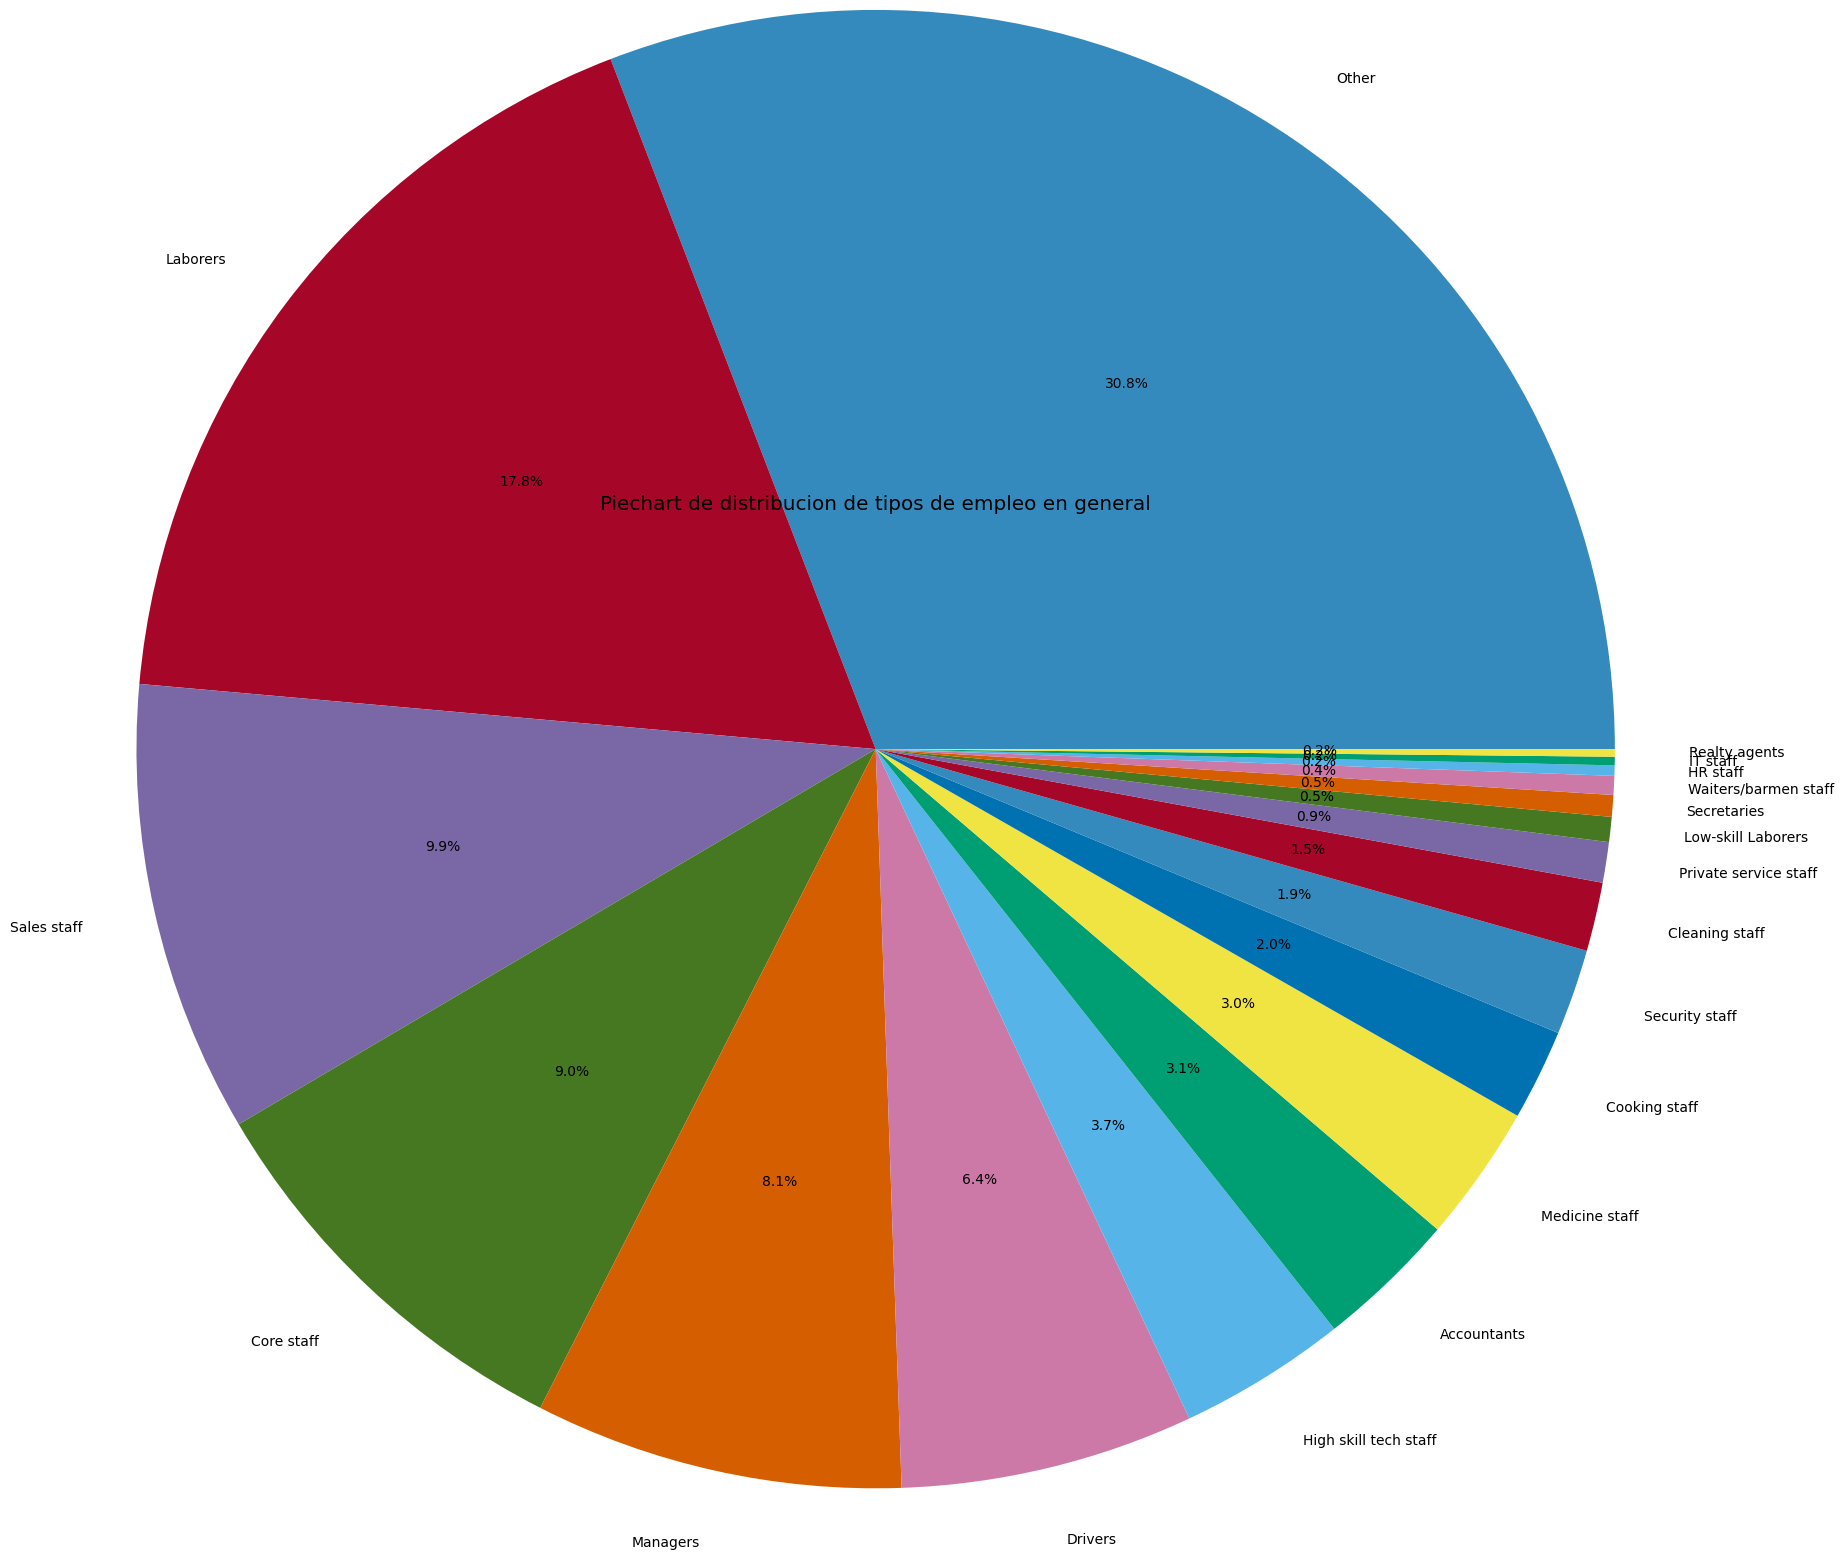

In [83]:
fig,ax = plt.subplots(figsize =(10, 6))
ax.pie(data_ocupaciones,labels=data_ocupaciones.index,autopct='%1.1f%%',radius=4)
ax.set_title('Piechart de distribucion de tipos de empleo en general')

*   En el segundo grafico, podemos observar que la mayor parte de los individuos de la muestra total tienen ocupaciones distintas a las que hay, con un 30.8%. Eso podria tener un poco que ver con el hecho de que hayan individuos que con menos de 5 años de trabajo tengan los requisitos economicos suficientes como para tener credito. Es decir, puede ser que se este hablando de una herencia, tanto como una familia enriquezida tanto como algun otro tipo de trabajo. Habria que analizar la variable income type, ya que con esta observacion se entiende que el individuo puede tener otro tipo de ingreso tambien.
*   Podemos observar que el 17,8% de la muestra total, son obreros. Le siguen personal de venta, core staff y managers. Agentes de IT, agentes de recursos humanos, agentes inmobiliarios, representan cada uno el 0.2% de la muestra total.
*   El primer grafico representa el tipo de trabajo de cada individuo que pertenece al target para obtener credito.
Podemos observar que la mayoria de los individuos de la muestra tambien pertenecen al tipo de trabajo 'otro', aunque el porcentaje decrece. Por otro lado, el orden de los 3 tipos de trabajo que le siguen cambian, quedando managers, core staff y sale staff. Aun asi, si comparamos las dos distribuciones no hay una diferencia tan significativa como para deducir si hay una influencia en el tipo de trabajo para decidir si un individuo puede obtener o no credito.
*   Con esta informacion todavia no se puede asegurar si el tipo de trabajo tiene influencia o no. Deberia analizar el tipo de ingreso y el estado civil de cada individuo para encontrar alguna relacion entre estas variables para decidir si influyen o no.








**6. ¿Como se distribuye la variable de antiguedad de la cuenta bancaria de un individuo respecto de sus ingresos totales?**

Hipotesis: La variable de antiguedad de la cuenta bancaria de un individuo se va a distribuir con un sesgo hacia la derecha ya que la mediana es 26, es decir, el 50% de las cuentas de los individuos de la muestra llevan menos de 26 años activas.  

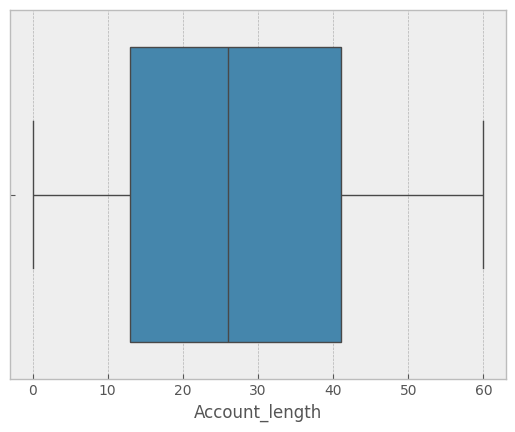

In [88]:
#Boxplot
ax = sns.boxplot(x=df_CreditCards["Account_length"])

*   Podemos observar que la caja esta dividida por la mediana, cuyo valor es 26 y se puede observar que la muestra se distribuye con un sesgo a la derecha.
*   Se puede observar tambien que no hay puntos criticos, y que la mayoria de los datos se distribuyen entre los valores 13 y 41, que son el segundo y tercer cuartil.

